In [3]:
# Import modules
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Open the file containing the dataset.
datei = pd.read_csv("/home/andre/Desktop/dataset.csv")

In [5]:
# Show the first five registers from dataframe.
datei.head()

,date,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov,open,high,low,close,adjclose,volume,ticker
0,2011-01-01,Uptrend,0.83,10.943548,"132,66","106,1","163,71","1,67411428571429",1525.61,66575,9.264964,9.492898,7.756332,7.936712,6.187788,149128856,LREN3.SA
1,2011-02-01,Uptrend,0.80,11.250000,"136,18","111,4","166,17","1,66719",1533.05,67383,8.033461,8.736943,7.756332,8.363064,6.520191,120569757,LREN3.SA
2,2011-03-01,Uptrend,0.79,11.717742,"144,93","105,3","162,43","1,6583",1629.59,68587,8.364704,9.059987,8.140049,8.672990,6.761821,106565665,LREN3.SA
3,2011-04-01,Uptrend,0.77,11.800000,"139,89","108,5","163,01","1,58564736842105",1672.59,66133,8.672990,9.660159,8.625435,9.519135,7.440604,87893355,LREN3.SA
4,2011-05-01,Uptrend,0.47,12.000000,"143,23","106,4","155,6","1,61269090909091",1636.41,64620,9.512576,9.819222,8.896005,9.814302,7.843419,108838470,LREN3.SA


In [6]:
# Replace the periods by comma. 
datei['IBC-Br'] = [float(str(i).replace(",", ".")) for i in datei['IBC-Br']]
datei['icom'] = [float(str(i).replace(",", ".")) for i in datei['icom']]
datei['dolar'] = datei['dolar'].str.replace(',','.')
datei['expectativa'] = datei['expectativa'].str.replace(',','.')

In [7]:
# converting object type column to float.
datei['dolar'] = datei['dolar'].astype(float) 
datei['expectativa'] = datei['expectativa'].astype(float) 

In [8]:
# Remove the columns do not needed.
neu_datei = datei.drop(columns=['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], axis = 1)

In [27]:
# Return a Series containing counts of unique values
datei['trend'].value_counts() 

Uptrend      85
Downtrend    47
Name: trend, dtype: int64

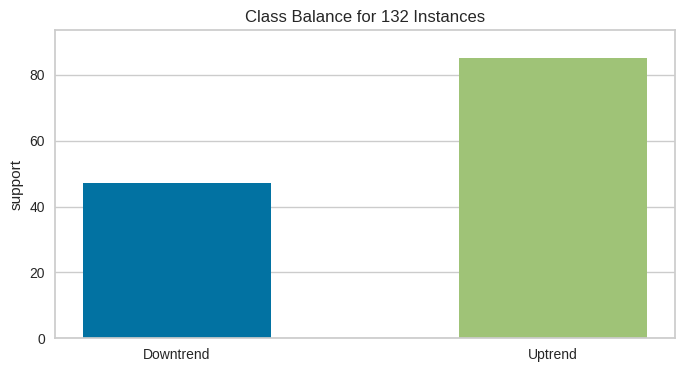

In [10]:
# Predictor class parsing (class balance) 
# yellowbrick. Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn.
from yellowbrick.target import ClassBalance

# plt.figure() Create a new figure, or activate an existing figure.
# figsize() Width, height in inches.
plt.figure(figsize=(8, 4))

# Instantiate the visualizer
Sehen = ClassBalance(labels=["Downtrend","Uptrend"])

# Fit the data to the visualizer
Sehen.fit(neu_datei['trend']) # trend is predictor class. The trend of stock.
Sehen.show(); # Finalize and render the figure

In [11]:
# Select the macroeconomic indicators.
previsores = neu_datei.drop(['trend'], axis = 1)
X = previsores.iloc[:,0:132].values
previsores

,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov
0,0.83,10.943548,132.66,106.1,163.71,1.674114,1525.61,66575
1,0.80,11.250000,136.18,111.4,166.17,1.667190,1533.05,67383
2,0.79,11.717742,144.93,105.3,162.43,1.658300,1629.59,68587
3,0.77,11.800000,139.89,108.5,163.01,1.585647,1672.59,66133
4,0.47,12.000000,143.23,106.4,155.60,1.612691,1636.41,64620
...,...,...,...,...,...,...,...,...
127,0.87,5.120968,142.05,100.9,143.86,5.251123,5007.44,118781
128,1.16,5.516667,138.96,94.1,148.22,5.279090,4709.56,110979
129,1.25,6.443548,138.46,94.2,142.89,5.539375,4251.43,103501
130,0.95,7.750000,140.22,88.0,142.22,5.556260,3932.70,101915


In [12]:
# Getting the number of columns in a list
Säulen = list(previsores.columns)
len(Säulen) # Getting the number of the elements in the list

8

In [59]:
Säulen

['ipca', 'selic', 'IBC-Br', 'icom', 'expectativa', 'dolar', 'icon', 'ibov']

In [13]:
# Visualizing the elements within the column 'trend'
y = datei['trend']
y

0        Uptrend
1        Uptrend
2        Uptrend
3        Uptrend
4        Uptrend
         ...    
127    Downtrend
128    Downtrend
129    Downtrend
130    Downtrend
131    Downtrend
Name: trend, Length: 132, dtype: object

In [14]:
len(y) # Getting the number of the elements for 'trend'

132

In [15]:
# Return a tuple representing the dimensionality of the DataFrame.
y.shape 

(132,)

In [16]:
# Return a tuple representing the dimensionality of the DataFrame.
X.shape

(132, 8)

In [17]:
# Transforming 'Uptrend' to 1 and 'Downtrend' to 0
y = datei['trend'].apply(lambda x: 1 if x == 'Uptrend' else 0)
y

0      1
1      1
2      1
3      1
4      1
      ..
127    0
128    0
129    0
130    0
131    0
Name: trend, Length: 132, dtype: int64

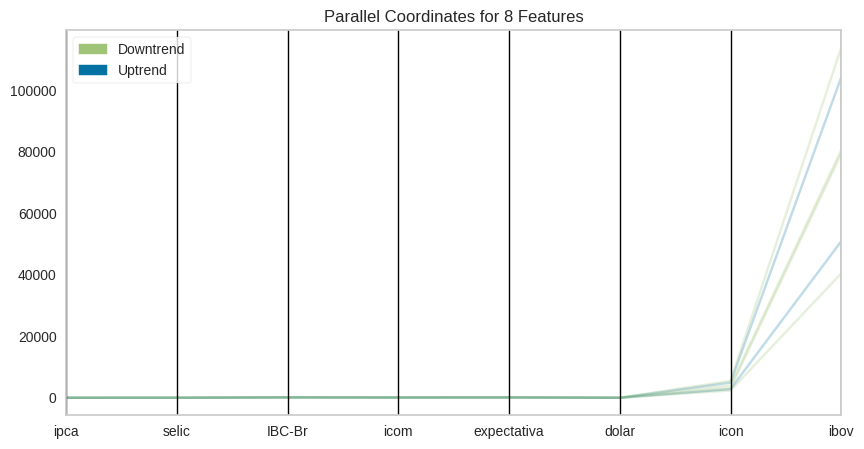

In [82]:
# plot instances as lines along vertical axes to detect classes or clusters
from yellowbrick.features import ParallelCoordinates

plt.figure(figsize=(10, 5))

Features = Säulen # Gives the list containing the names of columns
Classes = ["Uptrend", "Downtrend"] # Target variable

# Instantiate the visualizer
vzr = ParallelCoordinates(classes=Classes, features=Features, sample=0.05, shuffle=True)
vzr.fit_transform(previsores, neu_datei['trend'])
vzr.poof();  # Display

In [83]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.shape, y_train
print( f'Train the model with {X_train.shape[0]} records')
print(f'Train with {X_test.shape[0]} records')

Train the model with 99 records
Train with 33 records


In [84]:
# Implementation of the scikit-learn API for XGBoost classification
from xgboost import XGBClassifier

# Assigning the model
Model_XGB = xgb.XGBClassifier(
# Number of trees in the algorithm
n_estimators=500,
# Set to control the weighting of new trees added to the model
learning_rate=0.1,
# Maximum depth of a tree
# XGBoost consumes a lot of memory, so the bigger it is, the more memory it will need
max_depth=5,
# Minimum sum of instance weight
min_child_weight=1,
# Minimum loss mitigation needed to make an additional partition at a leaf node in the tree.
# The greater the 'gamma', the more conservative the algorithm.
gamma=0,
# Subsample ratio of training instances.
subsample=0.8,
# Denotes the fraction of columns to be randomly sampled for each tree.
colsample_bytree=0.8,
)
 
Model_XGB.fit(X_train, y_train) # Algorithm training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
# Predict the XGBoost model
Previsoes = Model_XGB.predict(X_test)

# Estimating the confusion matrix 
from sklearn.metrics import confusion_matrix
print('Confusion matrix: \n', confusion_matrix(y_test, Previsoes ))

Confusion matrix: 
 [[ 4  9]
 [ 1 19]]


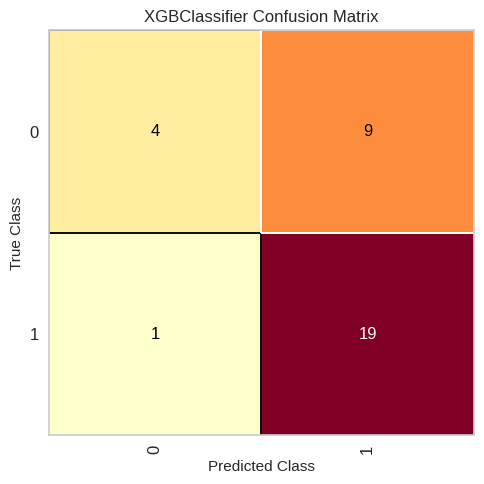

In [87]:
# Visualize the confusion matrix.
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(5, 5))
# The ConfusionMatrix visualizer taxes a model
Matriz_Confusao = ConfusionMatrix(Model_XGB, classes=[0, 1])
# Algorithm training
Matriz_Confusao.fit(X_train, y_train)
# Calculate the score
Matriz_Confusao.score(X_test, y_test)
# Chart plot
Matriz_Confusao.show();

In [88]:
# Build a text report showing the main classification metrics.
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y_test, Previsoes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.68      0.95      0.79        20

    accuracy                           0.70        33
   macro avg       0.74      0.63      0.62        33
weighted avg       0.73      0.70      0.65        33



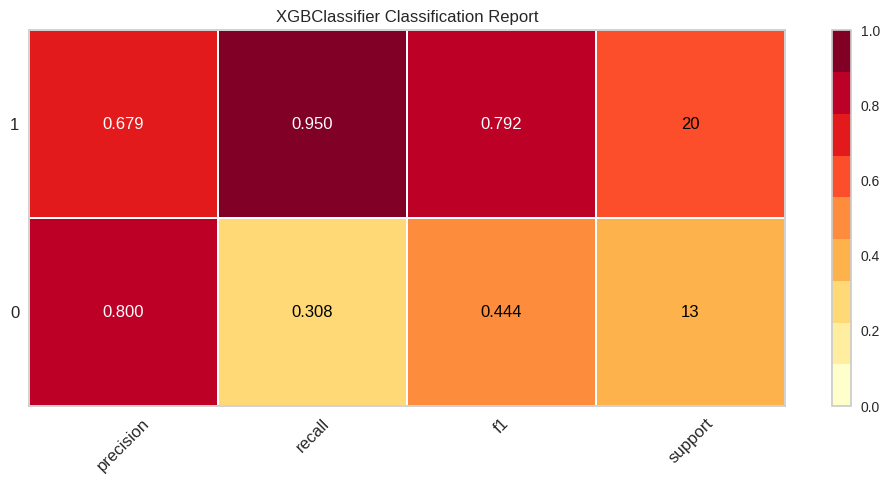

In [89]:
# Build a text report showing the main classification metrics.
from yellowbrick.classifier import ClassificationReport

plt.figure( figsize=(10, 5) )

# Classification report that shows the precision, recall, F1, and support scores for the model
Class_Report = ClassificationReport(Model_XGB, classes
=[0, 1], support=True)
# Algorithm training
Class_Report.fit(X_train, y_train)
# Calculate the score
Class_Report.score(X_test, y_test)
# Chart plot
Class_Report.show();

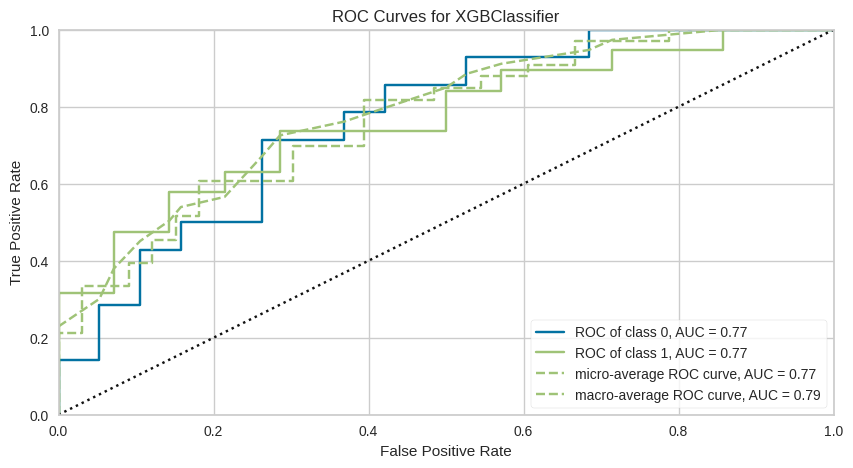

In [25]:
# A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) 
# plot allows the user to visualize the tradeoff between the classifier’s sensitivity
# and specificity.
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(10, 5))

Curva_ROC = ROCAUC(Model_XGB, classes=[0, 1])
# Fit the training data to the visualizer
Curva_ROC.fit(X_train, y_train)
# Evaluate the model on the test data
Curva_ROC.score(X_test, y_test)
# Finalize and show the figure
Curva_ROC.show();

In [91]:
# Evaluate a score by cross-validation.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Modelo_XGB = XGBClassifier()

# Repeated Stratified K-Fold cross validator.
Validacao_Cruzada = RepeatedStratifiedKFold(
# Splits number
n_splits=10,
# Number of repetitions
n_repeats=3,
# Random flag
random_state=10 )
# Algorithm training
Resultado_Scores = cross_val_score(
# Model
Modelo_XGB,
# Characteristics
X,
# Predictor
y,
# Metrics
scoring='accuracy',
# Validação cruzado
cv=Validacao_Cruzada,
# Number of parallel jobs [-1 means using all processors]
n_jobs=-1 )

print(f'Average Accuracy in Scores: { np.mean(Resultado_Scores) } ')

Average Accuracy in Scores: 0.8104395604395606 


In [ ]:
#!pip install xgboost

In [ ]:
#!pip install yellowbrick

In [86]:
# Show the metrics obtained by this model.
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy .: ", accuracy_score(y_test, Previsoes))  # Accuracy classification score.
print("Precision : ", precision_score(y_test, Previsoes))
print("Recall ...: ", recall_score(y_test, Previsoes))
print("F1 Score .: ", f1_score(y_test, Previsoes, average='macro'))

Accuracy .:  0.696969696969697
Precision :  0.6785714285714286
Recall ...:  0.95
F1 Score .:  0.6180555555555556


## Salving the classifier

In [39]:
import pickle
# The pickle module can transform a complex object into a byte stream 
# and it can transform the byte stream into an object with the same 
# internal structure.

In [40]:
file_name = "xgb_model.pkl"

In [41]:
# save
pickle.dump(Model_XGB, open(file_name, "wb"))

In [42]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

## Testing the saved model

In [55]:
# Test the saved model
xgb_model_loaded.predict(X_test)[10] # Selecting the variables of (X_test)[10]

0

In [56]:
# Shows the selected variables 
(X_test)[10]

array([5.50000000e-01, 7.35833333e+00, 1.49790000e+02, 1.04600000e+02,
       1.57350000e+02, 2.00163182e+00, 2.42325000e+03, 5.59100000e+04])

In [57]:
# Shows the probability of each class
xgb_model_loaded.predict_proba(X_test)[10]

array([0.6545791, 0.3454209], dtype=float32)

In [58]:
# show available classes
xgb_model_loaded.classes_

array([0, 1])